<div style="background-color: #88ffee; color: black; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

# HW 08: Singular Value Decomposition & Principal Component Analysis




### Instructions for Submitting Names in Notebooks

Please follow the format below when typing your names in the notebook. 

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**

#### Example:
    Poe, Edgar Allan

> ⚠️ **Failure to follow this format will result in a reduction of your grade.**

####  Learning Objectives:
* Understand the mathematical foundations of SVD and PCA
* Apply dimensionality reduction techniques to real-world datasets
* Visualize high-dimensional data in lower dimensions
* Interpret results and explain variance explained by principal components

---

### Hashem, Wahid

<div style="background-color: #e8f5e9; color: black; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 1: Lightning Questions about Linear Algebra (10)



Answer these questions, using $\LaTeX$ and markdown where needed:

* What rank is the identity matrix $I$? 
* If we multiply a matrix $A$ by a diagonal matrix $D$ from the left ($DA$), what does it do to the matrix? What if we multiply a matrix by a diagonal marix from the right ($AD$), what does that do? Use these two observations to give two interpretations of SVD (i.e., $U\Sigma$ and $\Sigma V^\mathsf{T}$).
* If we write our data matrix $X$ in terms of its SVD and set some of the SVs (singular values) to zero, do we change the size and shape of $X$? What exactly are we doing? 
* When we do PCA, we need a new data matrix $X'$ that is _smaller_ - we are doing dimensionality reduction. How do we make this smaller matrix? Do we just drop columns in $X$?!
* I am often very sloppy when I say that $C = X^TX$ is the correlation matrix. In what three ways might this be misleading/incorrect? 
* Suppose we have a square matrix. How are its eigenvalues related to its SVs?
* Explain explained variance. Is there a connection to the SVs in some way?
* What is the Kaiser criterion and how does it compare to elbow? 

#### ANSWER:

- The rank of the $n \times n$ identity matrix $I_n$ is $n$.
- Multiplying a matrix $A$ by a diagonal matrix $D$ on the left ($DA$) scales the rows of $A$, multiplying on the right ($AD$) scales the columns of $A$. In the SVD $A = U\Sigma V^\mathsf{T}$, $U\Sigma$ is $U$ with its columns scaled by the singular values, and $\Sigma V^\mathsf{T}$ is $V^\mathsf{T}$ with its rows (columns of $V$) scaled by the singular values.
- Setting some singular values to zero in the SVD of $X$ does not change the size and shape of $X$, but reduces its rank. You are basically keeping the most important singular directions and discarding the less important ones, giving a low-rank approximation of $X$.
- In PCA, the smaller data matrix $X'$ is formed by projecting $X$ onto the top $k$ principal components, e.g. $X' = X V_k$, rather than just dropping original columns of $X$.
- Calling $C = X^\mathsf{T}X$ a “correlation matrix” is misleading because: 
  - Even if $X$ is centered (mean = 0), the covariance matrix is $\frac{1}{n-1}X^\mathsf{T}X$, not $X^\mathsf{T}X$ itself.
  - A correlation matrix also requires standardizing each column to a variance of 1. 
  - If $X$ is not centered at all, $X^\mathsf{T}X$ is just a symmetric matrix of dot products, not covariance or correlation.
- For a square matrix $A$, the singular values are given by $\sigma_i = \sqrt{\lambda_i(A^\mathsf{T}A)}$. If $A$ is symmetric positive semidefinite then $\sigma_i = \lambda_i(A)$, and if $A$ is symmetric in general then $\sigma_i = |\lambda_i(A)|$.
- Explained variance is the amount of data variance captured by each principal component (its eigenvalue), and for centered data with SVD $X = U\Sigma V^\mathsf{T}$ we have $\lambda_i = \sigma_i^2/(n-1)$, so the proportion of variance explained by PC $i$ is $\sigma_i^2 / \sum_j \sigma_j^2$.
- The Kaiser criterion keeps components with eigenvalues $> 1$ (on the correlation matrix), whereas the elbow method chooses the number of components by visually finding the “knee” in a scree plot where adding more components gives diminishing returns in explained variance.



<div style="background-color: #f0f8ff; color: black; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 2: Interpolation "_By Hand_" with the Normal Equation (10)



In this course you have learned three ways of doing linear regression:
1. by hand: solving $N$ equations in $N$ unknowns for the weights; this was only practical for a very small number of weights
2. optimization: we can cast finding the weights as the minimization of a loss function $L({\bf w})$ that depends on the weights 
3. by inverting a matrix for the case of a square matrix (which is "interpolation")

The third way is generalized to non-square matrices through the use of the Moore-Penrose pseudoinverse $X^+$. 

Begin with the Moore-Penrose pseudoinverse expression for linear regression. That is, write down the **Normal Equation**, which looks unlike the other ways we have approached linear regression! You will make them look the same here! 

You are given two data points $(x_1, y_1)$ and $(x_2, y_2)$ and a model $y = w_0 + w_1x$.  First write down the expressions for $w_0$ and $w_1$ in terms of the data, using $\LaTeX$. You have done this before, so don't spend too much time on this - go find it! I want you to have the equations here in front of you. 

Next show **all** of the math steps to derive the weights from the **Normal Equation**. That is, in the **Normal Equation** write down what ${\bf y}$ is, what $X$ is, what $X^TX$ is and so on. Do all steps by hand in $\LaTeX$. One you have the vector ${\bf w}$ separate it into $w_0$ and $w_1$ and compare to what you got with the more direct way. 

Recall that I showed in class that the inverse of a $2\times 2$ matrix can be done analytically and I gave the expression in the slides.

Does the **Normal Equation** yield the same expressions for $w_0$ and $w_1$ as you obtained by solving two equations in two unknowns? Why or why not? 

#### ANSWER:

- The Normal Equation for linear regression is given by: ${\bf w} = (X^\mathsf{T}X)^{-1}X^\mathsf{T}{\bf y}$.
\
\
By hand
- For two data points $(x_1, y_1)$ and $(x_2, y_2)$ and model $y = w_0 + w_1 x$, we have: $y_1 = w_0 + w_1 x_1$, $y_2 = w_0 + w_1 x_2$.
- Subtracting the first from second: $y_2 - y_1 = w_1 (x_2 - x_1) \implies w_1 = \frac{y_2 - y_1}{x_2 - x_1}$.
- Substituting $w_1$ back into the first equation: $y_1 = w_0 + \frac{y_2 - y_1}{x_2 - x_1} x_1 \implies w_0 = y_1 - \frac{y_2 - y_1}{x_2 - x_1} x_1 = \frac{y_1 x_2 - y_2 x_1}{x_2 - x_1}$.
- $w_0 = \frac{y_1 x_2 - y_2 x_1}{x_2 - x_1}, \quad w_1 = \frac{y_2 - y_1}{x_2 - x_1}$
\
\
Matrix Form (Normal Equation)
- We write the model in matrix form ${\bf y} = X{\bf w}$, where
  $X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \end{bmatrix}$,
  ${\bf y} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}$,
  and ${\bf w} = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$.
- Next, we compute $X^\mathsf{T}X$:
$X^\mathsf{T}X = \begin{bmatrix} 1 & 1 \\ x_1 & x_2 \end{bmatrix} \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \end{bmatrix} = \begin{bmatrix} 2 & x_1 + x_2 \\ x_1 + x_2 & x_1^2 + x_2^2 \end{bmatrix}$
- The inverse of $X^\mathsf{T}X$ is given by:
$(X^\mathsf{T}X)^{-1} = \frac{1}{(2)(x_1^2 + x_2^2) - (x_1 + x_2)^2} \begin{bmatrix} x_1^2 + x_2^2 & -(x_1 + x_2) \\ -(x_1 + x_2) & 2 \end{bmatrix}$
- Now we compute $X^\mathsf{T}{\bf y}$:
$X^\mathsf{T}{\bf y} = \begin{bmatrix} 1 & 1 \\ x_1 & x_2 \end{bmatrix} \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = \begin{bmatrix} y_1 + y_2 \\ x_1y_1 + x_2y_2 \end{bmatrix}$
- Finally, we can compute the weights:
${\bf w} = (X^\mathsf{T}X)^{-1}X^\mathsf{T}{\bf y} = \frac{1}{(2)(x_1^2 + x_2^2) - (x_1 + x_2)^2} \begin{bmatrix} x_1^2 + x_2^2 & -(x_1 + x_2) \\ -(x_1 + x_2) & 2 \end{bmatrix} \begin{bmatrix} y_1 + y_2 \\ x_1y_1 + x_2y_2 \end{bmatrix}$
- $w_1 = \frac{1}{(x_1 - x_2)^2}
\Big[
-(x_1 + x_2)(y_1 + y_2) + 2(x_1 y_1 + x_2 y_2)
\Big]
= \frac{y_2 - y_1}{x_2 - x_1}$
- $w_0 = \frac{1}{(x_1 - x_2)^2}
\Big[(x_1^2 + x_2^2)(y_1 + y_2) - (x_1 + x_2)(x_1y_1 + x_2y_2)\Big]
= \frac{y_1x_2 - y_2x_1}{x_2 - x_1}$
- $w_0 = \frac{y_1x_2 - y_2x_1}{x_2 - x_1}, \quad w_1 = \frac{y_2 - y_1}{x_2 - x_1}$
- Yes, the Normal Equation gives the same expressions for $w_0$ and $w_1$ as obtained by solving two equations in two unknowns, because both methods are solving the same pair of linear equations, and as long as $x_1 \neq x_2$, there is only one line that fits both points exactly.



<div style="background-color: #f0fffeff; color: black; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 3: Confounding Variables (10 points)



In this problem, we will explore how a confounding variable affects our ability to estimate the true relationship between a predictor and an outcome. Read through the code below, understand it, look at the plots and then the numerical results. Answer the questions below all of that. This should help you understand this issue more concretely than you might have gotten from the textbook. 

Our variables are:
* $y$: the outcome variable
* $x$: the predictor of interest
* $z$: a confounding variable

The true relationships in our data are:
* $z = 0.7x + \epsilon_z$
* $y = 2x + 3z + \epsilon_y$

This code uses a method called "residual regression".  The residual regression method works as follows:
1. First regress x on z: 
   * $x = \beta_1z + \epsilon_1$
   * Save residuals: $r_x = x - \hat{x} = x - \beta_1z$
2. Then regress y on z:
   * $y = \beta_2z + \epsilon_2$
   * Save residuals: $r_y = y - \hat{y} = y - \beta_2z$
3. Finally, regress $r_y$ on $r_x$:
   * $r_y = \beta_3r_x + \epsilon_3$
   * The coefficient $\beta_3$ estimates the true effect of x on y

This method removes the confounding effect of z by working with the parts of x and y that are uncorrelated with z (the residuals).

We will analyze this in two ways:
1. Naive Analysis: directly regressing y on x, ignoring z
2. Controlled Analysis: accounting for the confounding effect of z



Naive Analysis (y ~ x):
Coefficient: 4.085
P-value: 3.609e-59

Controlled Analysis (accounting for z):
Coefficient: 2.127
P-value: 5.896e-28


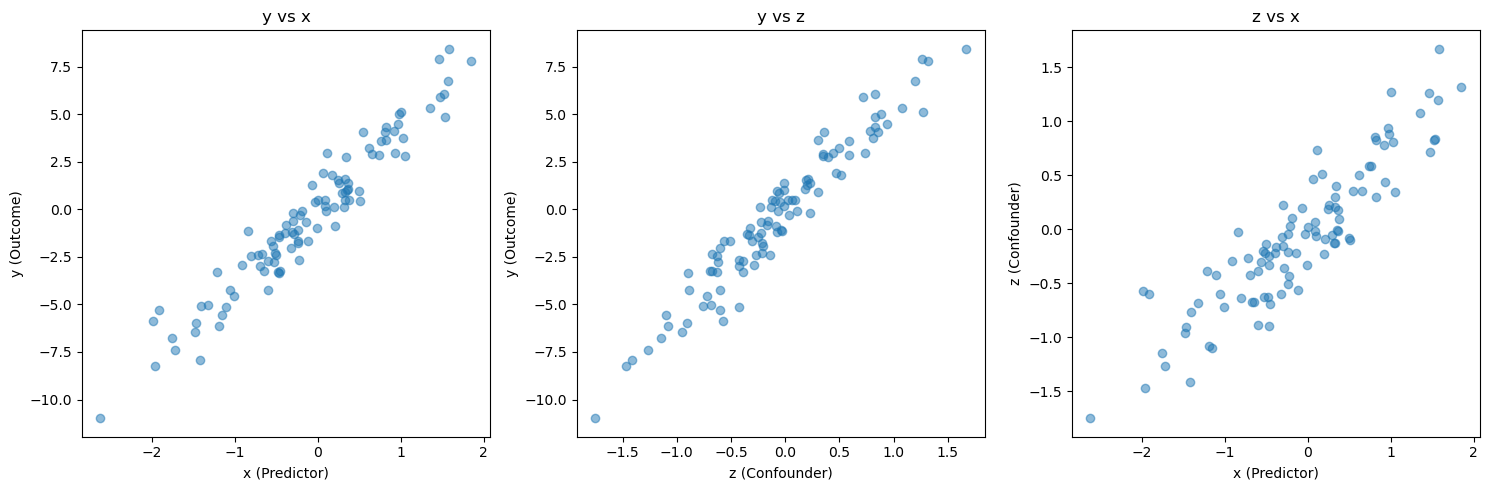

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)
n = 100

# Generate data
x = np.random.normal(0, 1, n)
z = 0.7*x + 0.3*np.random.normal(0, 1, n)  # confounder
y = 2*x + 3*z + np.random.normal(0, 0.5, n)  # outcome

# Create figure with plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot relationships
ax1.scatter(x, y, alpha=0.5)
ax1.set_xlabel('x (Predictor)')
ax1.set_ylabel('y (Outcome)')
ax1.set_title('y vs x')

ax2.scatter(z, y, alpha=0.5)
ax2.set_xlabel('z (Confounder)')
ax2.set_ylabel('y (Outcome)')
ax2.set_title('y vs z')

ax3.scatter(x, z, alpha=0.5)
ax3.set_xlabel('x (Predictor)')
ax3.set_ylabel('z (Confounder)')
ax3.set_title('z vs x')

plt.tight_layout()

# Naive Analysis: regressing y on x directly
naive_model = stats.linregress(x, y)
print("\nNaive Analysis (y ~ x):")
print(f"Coefficient: {naive_model.slope:.3f}")
print(f"P-value: {naive_model.pvalue:.3e}")

# Controlled Analysis
# Step 1: Get residuals of x after controlling for z
model_xz = stats.linregress(z, x)
predicted_x = model_xz.slope * z + model_xz.intercept
residuals_x = x - predicted_x

# Step 2: Get residuals of y after controlling for z
model_yz = stats.linregress(z, y)
predicted_y = model_yz.slope * z + model_yz.intercept
residuals_y = y - predicted_y

# Step 3: Regress residuals to get controlled effect
controlled_model = stats.linregress(residuals_x, residuals_y)
print("\nControlled Analysis (accounting for z):")
print(f"Coefficient: {controlled_model.slope:.3f}")
print(f"P-value: {controlled_model.pvalue:.3e}")

Answer the following questions:

1. (3 pts) Initial Analysis:
   - Looking at the scatter plots, describe the relationship between x and y
   - Looking at the scatter plots, describe the relationship between x and z
   - In the Naive Analysis, what is the estimated coefficient for x? How does this compare to the true effect (β = 2)?

2. (3 pts) Understanding Confounding:
   - Given that y = 2x + 3z + ε, explain why the coefficient in the Naive Analysis is not 2
   - Looking at the x vs z plot, what does the pattern tell you about how z confounds the relationship?
   - Why do we need to control for z to get the true effect of x on y?

3. (2 pts) Residual Analysis:
   - The residuals rx (from x ~ z) represent what's left of x after removing z's effect
   - The residuals ry (from y ~ z) represent what's left of y after removing z's effect
   - Why does regressing ry on rx help us find the true effect of x on y?

4. (2 pts) Final Results:
   - What is the coefficient in the Controlled Analysis?
   - Is this closer to the true value (β = 2)? Explain why this makes sense.

#### ANSWER:

1. Initial Analysis:
   - The scatter plot of x vs y shows a positive linear relationship, indicating that as x increases, y tends to increase as well.
   - The scatter plot of x vs z also shows a positive linear relationship, suggesting that higher values of x are associated with higher values of z. However, it has more spread compared to the x vs y plot.
   - In the Naive Analysis, the estimated coefficient for x is approximately 4.085, which is significantly higher than the true effect of β = 2.

2. Understanding Confounding:
   - The coefficient in the Naive Analysis is not 2 because z is positively correlated with x and also has a direct effect on y. This means that part of the effect attributed to x in the naive regression is actually due to z, which inflates the slope above the true effect (β = 2).
   - The pattern in the x vs z plot indicates that they are strongly positvely correlated, which means as x increases, z also tends to increase. This correlation means that changes in z can influence y, confounding the relationship between x and y.
   - We need to control for z to isolate the effect of x on y. By controlling z, we can remove its influence and obtain a more accurate estimate of how x directly affects y.

3. Residual Analysis:
   - Regress x on z: $x = \beta_1z + \epsilon_1$. The residuals $r_x = x - \hat{x}$ represent the portion of x that is not explained by z.
   - Regress y on z: $y = \beta_2z + \epsilon_2$. The residuals $r_y = y - \hat{y}$ represent the portion of y that is not explained by z.
   - Regressing ry on rx helps us find the true effect of x on y because we are now examining the relationship between the parts of x and y that are independent of z, allowing us to isolate the direct effect of x on y.

4. Final Results:
   - In the Controlled Analysis, the estimated coefficient for x is approximately 2.127.
   - Yes, this is much closer to the true value of β = 2. This makes sense because by controlling for the confounding variable z, we have removed its influence from both x and y, allowing us to accurately estimate the direct effect of x on y without bias.

<div style="background-color: #e8f5e9; color: black; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 4: Scree and BiPlot (10)



In this question you will explore scree and biplots. The code is given: comment it in detail to prove you totally understand what it does. Then, you will answer questions below. 


Feature loadings (scaled by singular values):
alcohol                  : PC1 = -4.1772, PC2 = -10.1965
malic_acid               : PC1 =  7.0962, PC2 = -4.7421
ash                      : PC1 =  0.0594, PC2 = -6.6634
alcalinity_of_ash        : PC1 =  6.9264, PC2 =  0.2233
magnesium                : PC1 = -4.1095, PC2 = -6.3170
total_phenols            : PC1 = -11.4223, PC2 = -1.3712
flavanoids               : PC1 = -12.2406, PC2 =  0.0708
nonflavanoid_phenols     : PC1 =  8.6402, PC2 = -0.6067
proanthocyanins          : PC1 = -9.0713, PC2 = -0.8286
color_intensity          : PC1 =  2.5647, PC2 = -11.1735
hue                      : PC1 = -8.5875, PC2 =  5.8869
od280/od315_of_diluted_wines: PC1 = -10.8871, PC2 =  3.4680
proline                  : PC1 = -8.2992, PC2 = -7.6930


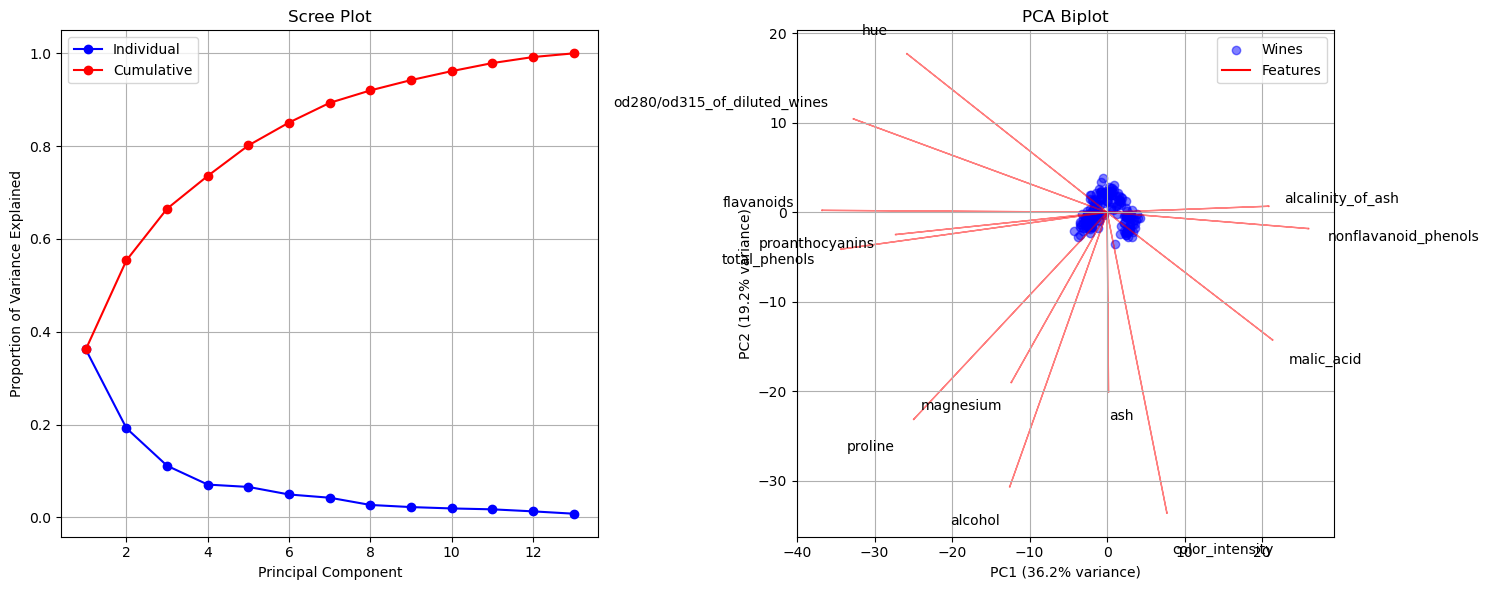

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load and prepare data
wine = load_wine() # load wine dataset from sklearn
X = wine.data # features matrix (13 chemical properties)
X_scaled = StandardScaler().fit_transform(X) # standardize features (mean=0, variance=1). Important for PCA!

# Perform PCA
U, s, Vt = np.linalg.svd(X_scaled) # do pca via svd. U is left singular vectors, s are singular values, Vt is right singular vectors (transposed).
V = Vt.T # transpose Vt to get V (loadings)

# Create figure with both scree and biplot
fig = plt.figure(figsize=(15, 6))

# 1. Scree plot
plt.subplot(121) # left subplot, 1 row, 2 columns, 1st plot
var_exp = s**2 / np.sum(s**2) # proportion of variance explained by each principal component
cum_var_exp = np.cumsum(var_exp) # cumulative variance explained

plt.plot(range(1, len(var_exp) + 1), var_exp, 'bo-', label='Individual') # plot individual variance explained
plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'ro-', label='Cumulative') # plot cumulative variance explained
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)

# 2. Biplot
plt.subplot(122) # right subplot, 1 row, 2 columns, 2nd plot
scores = X_scaled @ V # project data onto principal components to get scores
scale = 3  # Adjust this to change relative scaling of arrows

# Plot scores
plt.scatter(scores[:,0], scores[:,1], c='b', alpha=0.5, label='Wines') # plot scores for first two principal components

# Plot loadings
for i, feature in enumerate(wine.feature_names):
    x = V[i,0] * s[0] * scale # scale loadings by singular values for better visualization
    y = V[i,1] * s[1] * scale # scale loadings by singular values for better visualization
    
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.1) # draw arrows for loadings
    
    # Add labels with offset based on quadrant to avoid overlap
    if x >= 0:
        ha = 'left'
    else:
        ha = 'right'
    if y >= 0:
        va = 'bottom'
    else:
        va = 'top'
        
    plt.text(x*1.1, y*1.1, feature, ha=ha, va=va) # label arrows

plt.xlabel(f"PC1 ({var_exp[0]:.1%} variance)") # x-axis label with variance explained
plt.ylabel(f"PC2 ({var_exp[1]:.1%} variance)") # y-axis label with variance explained
plt.title('PCA Biplot')
plt.grid(True)

# Add legend
plt.plot([0], [0], 'r-', label='Features')
plt.legend()

plt.tight_layout()

# Print feature loadings for reference
print("\nFeature loadings (scaled by singular values):")
for name, v1, v2 in zip(wine.feature_names, 
                       V[:,0] * s[0], 
                       V[:,1] * s[1]):
    print(f"{name:25s}: PC1 = {v1:7.4f}, PC2 = {v2:7.4f}") # print loadings scaled by singular values


#### Scree Plot Analysis (4 points)
1. (2 pts) Using the scree plot:
   - How many components would you keep based on the "elbow" criterion?
   - What is the cumulative variance explained by these components?

2. (2 pts) Looking at the relationship between individual and cumulative variance:
   - What percentage of variance is explained by PC1 alone?
   - How much additional variance does PC2 capture?
   - Based on these numbers, justify whether using only PC1 would be sufficient.

#### Biplot Interpretation (6 points)
3. (2 pts) Feature groupings:
   - Which features point in similar directions along PC1? 
   - Find two features that point in nearly perpendicular directions. What does this suggest about their relationship?

4. (2 pts) Feature representation:
   - Identify two features that would be poorly represented if we only kept PC1.
   - Explain why these features would be poorly represented (hint: look at their orientation).

5. (2 pts) Chemical interpretation:
   - Based on which features align strongly with PC1, what chemical property seems to explain the most variation in wines?
   - Looking at PC2's strongest features, what might this second component represent chemically?

For reference, the features are:
- alcohol
- malic_acid
- ash
- alcalinity_of_ash
- magnesium
- total_phenols
- flavanoids
- nonflavanoid_phenols
- proanthocyanins
- color_intensity
- hue
- od280/od315_of_diluted_wines
- proline

Note: In your answers, refer to specific features by name and support your interpretations with observations from the plots.

#### ANSWER:
1. Using the scree plot:
   - Based on the "elbow" criterion, I would keep 3 components, as the plot shows a clear bend after the 3rd component.
   - Based on the red line (cumulative) in the scree plot, the cumulative variance explained by these 3 components is approximately 65%.
2. Looking at the relationship between individual and cumulative variance:
   - Based on the scree plot, PC1 alone explains about 37%.
   - Based on the scree plot, PC2 captures an additional 19% of variance, which brings the cumulative variance explained by the first two components to about 56%.
   - No, using only PC1 would not be sufficient. PC1 captures about only 37% of the variance, which means that a significant portion of the data's variability would be lost. Including PC2 adds a substantial amount of explained variance (19%), making it important to consider at least the first two components for a more comprehensive representation of the data. Additionally, PC3 increases the cumulative variance to around 65%, which supports keeping 3 components.
3. Feature groupings:
   - Features that point in similar directions along PC1 in the strong negative direction include total_phenols, flavanoids, proanthocyanins, od280/od315_of_diluted_wines, proline, and hue. This suggests that these features are positively correlated with each other in the dataset. In the strong positive direction along PC1 include nonflavanoid_phenols, malic_acid, and alcalinity_of_ash, indicating that these features also share a positive correlation.
   - Two features that point in nearly perpendicular directions are ash and flavanoids. This suggests that there is little to no correlation between these two features.
4. Feature representation:
   - Two features that would be poorly represented if we only kept PC1 are ash (PC1 =  0.0594, PC2 = -6.6634) and color_intensity (PC1 =  2.5647, PC2 = -11.1735). Both are large in PC2 but small in PC1.
   - These features would be poorly represented because their vectors are oriented more towards PC2 rather than PC1. Their horizontal components (PC1) are small, indicating that they do not contribute significantly to the variance captured by PC1. So, if we only consider PC1, we would lose important information about these features.
5. Chemical interpretation:
   - Features that strongly align with PC1 include total_phenols, flavanoids, proanthocyanins, od280/od315_of_diluted_wines, proline, and hue. In the opposite direction, nonflavanoid_phenols, malic_acid, and alcalinity_of_ash also align strongly with PC1. This suggests that phenolic content and related chemical properties explain the most variation in wines.
   - Looking at PC2's strongest features, which include alcohol, ash, magnesium, color_intensity, and proline, this second component might represent properties related to the mineral content and overall composition of the wine.

<div style="background-color: #e8f5e9; color: black; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 5: PCA Understanding (10)



Answer these questions in a markdown cell using equations where necessary:
1. When we use SVD, we use three matrices $U$, $\Sigma$ and $V$; when we work with the covariance matrix $C$, we often focus on $V$ - why is that? 
2. What are the eigenvectors of $C$? What are the eigenvalues?
3. What purpose does $U$ have? Do $V$ and $U$ have different purposes? If so, why? If not, why not? What purpose does $\Sigma$ have?
4. In what ways does the use of $C$, rather than just $X$ itself, inform us to the meanings of $U$ and $V$? 
5. Given PCA's focus on $C$, what does PCA reveal to us geometrically? 


#### ANSWER:

1. The covariance matrix is $C = \frac{1}{n-1} X^\mathsf{T} X$. With the SVD $X = U \Sigma V^\mathsf{T}$, we get $C = \frac{1}{n-1} V \Sigma^2 V^\mathsf{T}.$ This shows that all the information about directions and variances across the features is contained in $V$ and $\Sigma^2$. The columns of $V$ are therefore the principal directions that PCA focuses on, which is why we mainly look at $V$ when working with $C$.

2. The eigenvectors of $C$ are the columns of $V$, which represent the principal components or directions in feature space that capture maximal variance. The eigenvalues of $C$ are given by $\lambda_i = \frac{\sigma_i^2}{n-1}$, where $\sigma_i$ are the singular values from $\Sigma$. These eigenvalues quantify the amount of variance explained by each principal component.

3. The matrix $U$ contains the left singular vectors, which represent directions in the sample space. $V$ and $U$ have different purposes: $V$ relates to the feature space and how features combine to form principal components, while $U$ relates to how samples project onto these components. The diagonal matrix $\Sigma$ contains the singular values, which scale the contributions of each principal component in terms of variance.

4. The covariance matrix $C$ captures how the features vary together across samples. By analyzing $C$, we see that $V$ contains directions in feature space that capture maximal variance, while $U$ contains directions in sample space. Thus, $V$ relates to how features combine to form principal components, while $U$ relates to how samples project onto these components. The use of $C$ highlights this duality between features and samples.

5. PCA reveals geometrically that the data can be represented in a lower-dimensional space defined by the principal components (the eigenvectors of $C$). Each principal component corresponds to a direction in feature space along which the data varies the most. By projecting the data onto these components, PCA identifies the axes that capture the most significant patterns and structures in the data, allowing for dimensionality reduction while preserving as much variance as possible.


<div style="background-color: #f0f8ff; color: black; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 6: PCA Visualization (10)
</div>



#### Part 1: Data Preparation and SVD Basics
1. Load the Palmer Penguins dataset and prepare it:
   - Handle missing values
   - Select only numeric columns
   - Scale the data appropriately
   - Keep track of species for later coloring (next problem)

2. Perform SVD step by step using `linalg`:
   - Compute $U$, $\Sigma$, and $V^\mathsf{T}$ matrices
   - Visualize each matrix using heatmaps (be careful with the shape of $\Sigma$ that is returned; you will need the $\sigma_i$ and $\lambda_i$ below)
   - Explain what each matrix represents in terms of the penguins data

#### Part 2: Understanding Variance
1. Create and interpret scree plots:
   - Plot singular values
   - Calculate and plot explained variance ratios
   - Create cumulative variance plot
   - Identify "elbow" point
   - Justify how many components you would keep

</div>

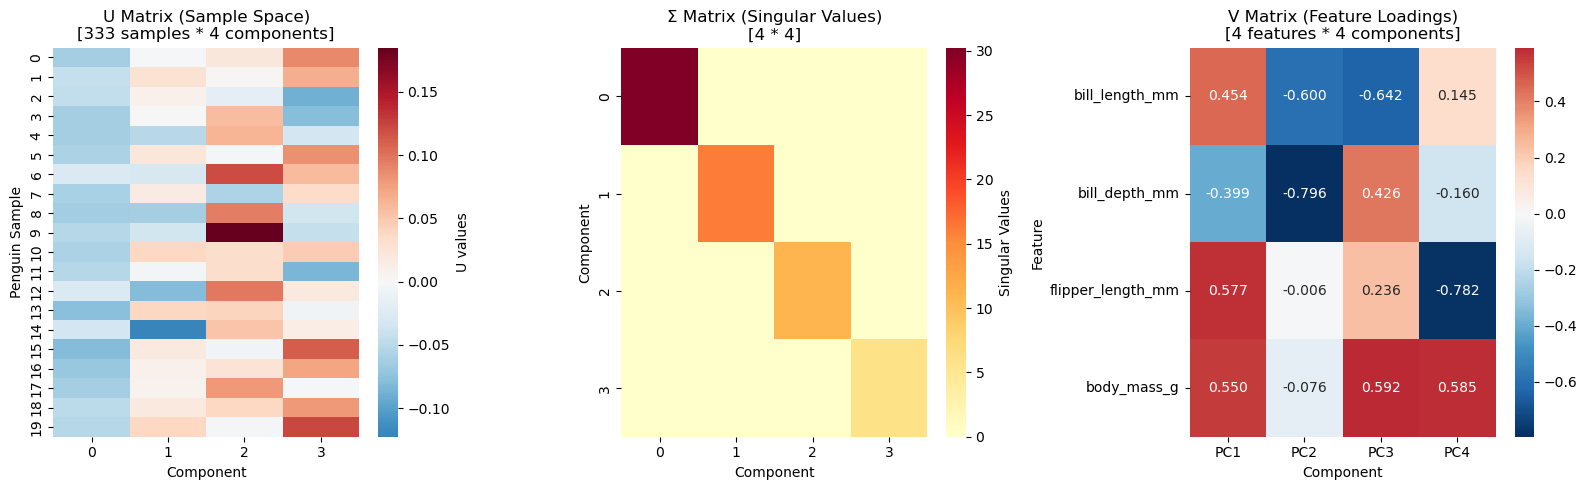

In [3]:
# ANSWER Part 1

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

penguins = sns.load_dataset('penguins')
penguins_clean = penguins.dropna()
numeric_cols = penguins_clean.select_dtypes(include=[np.number]).columns
X = penguins_clean[numeric_cols].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

U, s, Vt = np.linalg.svd(X_scaled, full_matrices=False)
V = Vt.T

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# U matrix (samples × components)
sns.heatmap(U[:20, :], cmap='RdBu_r', center=0, ax=axes[0], cbar_kws={'label': 'U values'})
axes[0].set_title('U Matrix (Sample Space)\n[333 samples * 4 components]')
axes[0].set_ylabel('Penguin Sample')
axes[0].set_xlabel('Component')

# Σ matrix (singular values as diagonal)
Sigma_diag = np.diag(s)
sns.heatmap(Sigma_diag, cmap='YlOrRd', ax=axes[1], cbar_kws={'label': 'Singular Values'})
axes[1].set_title('Σ Matrix (Singular Values)\n[4 * 4]')
axes[1].set_ylabel('Component')
axes[1].set_xlabel('Component')

# V matrix (features × components)
sns.heatmap(V, annot=True, fmt='.3f', cmap='RdBu_r', center=0, ax=axes[2], 
            xticklabels=[f'PC{i+1}' for i in range(len(s))],
            yticklabels=numeric_cols)
axes[2].set_title('V Matrix (Feature Loadings)\n[4 features * 4 components]')
axes[2].set_ylabel('Feature')
axes[2].set_xlabel('Component')

plt.tight_layout()
plt.show()

Each matrix represents:
- $U$: Shape is 333 samples x 4 components. $U$ has one row per penguin and one column per principal component (PC). Together with $\Sigma$, it gives the scores $U\Sigma$ which are the coordinates of each penguin on the PCs.
- $\Sigma$: 4 values (singular values). The diagonal entries are the singular values representing the strength of each principal component. Larger $\sigma_i$ means more variance captured by that component. $\sigma_i^2/(n-1)$ gives eigenvalues of covariance matrix.
- $V$: Shape is 4 features x 4 components (4 rows, 4 columns). Each row is a feature and each column is a PC. Entry $V_{ij}$ is the loading of feature $i$ on PC $j$. The rows are the 4 original features (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g). This is used to create loading plots (how features load onto PC1 and PC2) that show how strongly each feature contributes to each PC. For example, a value of 0.8 for bill_length_mm on PC1 means bill_length_mm strongly contributes to PC1.

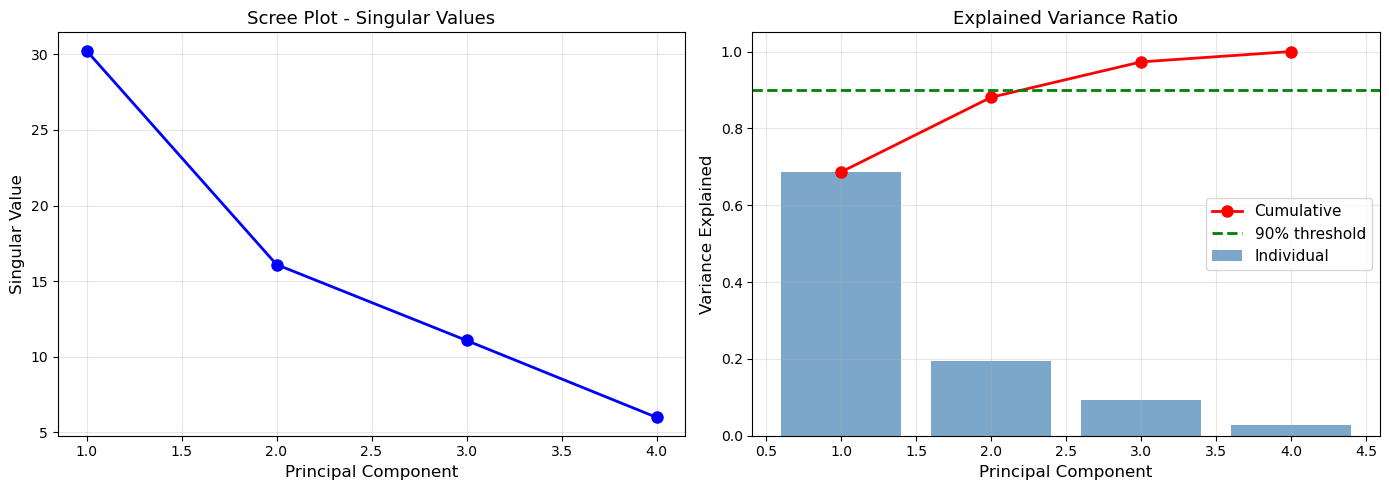

In [4]:
# ANSWER Part 2

explained_variance = s**2 / (len(X_scaled) - 1)
explained_variance_ratio = s**2 / np.sum(s**2)
cumulative_variance = np.cumsum(explained_variance_ratio)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(range(1, len(s) + 1), s, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Singular Value', fontsize=12)
ax1.set_title('Scree Plot - Singular Values', fontsize=13)
ax1.grid(True, alpha=0.3)

ax2.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
        alpha=0.7, label='Individual', color='steelblue')
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         'ro-', linewidth=2, markersize=8, label='Cumulative')
ax2.axhline(y=0.90, color='g', linestyle='--', linewidth=2, label='90% threshold')
ax2.set_xlabel('Principal Component', fontsize=12)
ax2.set_ylabel('Variance Explained', fontsize=12)
ax2.set_title('Explained Variance Ratio', fontsize=13)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- The "elbow" point in the scree plot occurs at 2 principal components, where the explained variance starts to level off.
- I would keep 2 components because they capture a significant portion of the variance (around 89%) while reducing dimensionality from 4 to 2, which simplifies visualization and analysis without losing much information.

<div style="background-color: #e8f5e9; color: black; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 7: EDA/Visualization with PCA (10)
</div>


Using your Penguin dataset, perform the following analyses using only `linalg` and no canned libaries:

1. **Principal Component Selection**
   - Calculate eigenvalues for all components
   - Create a scree plot showing:
     * Individual variance explained
     * Cumulative variance explained
   - Apply Kaiser criterion ($\lambda > 1$); that is, add a horizontal line at the apprpriat height
   - Justify your choice of number of components (markdown)

2. **Score Plot Analysis**
   - Create PC1 vs PC2 scatter plot
   - Color points by class/category
   - Add 95% confidence ellipses for each class
   - Label axes with variance explained
   - Interpret the clustering patterns

3. **Loading Plot Analysis**
   - Plot feature loadings as vectors
   - Scale arrows by loading magnitude
   - Label features clearly
   - Identify which features contribute most to each PC (markdown)

4. **Biplot Integration**
   - Combine scores and loadings in one plot
   - Ensure proper scaling of both components
   - Add a clear legend distinguishing:
     * Observations (points)
     * Features (arrows)
     * Class boundaries (ellipses)

5. **Interpretation & Insights**
   - Explain relationships between:
     * Features (using loading angles)
     * Classes (using score positions)
     * Features and classes (using biplot)
   - Identify which features best distinguish classes
   - Note any surprising patterns or outliers (markdown)

**Deliverables:**
- All plots with clear labels and legends
- Brief explanations of your findings (markdown)
- Justification for component selection (markdown)
- Discussion of practical implications (markdown)

**Tips:**
- Standardize your data before PCA
- Use consistent colors across all plots
- Add grid lines for easier interpretation


In [5]:
# ANSWER Setup Penguins Dataset
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

penguins = sns.load_dataset('penguins')
penguins_clean = penguins.dropna()
numeric_cols = penguins_clean.select_dtypes(include=[np.number]).columns
X = penguins_clean[numeric_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
U, s, Vt = np.linalg.svd(X_scaled, full_matrices=False)
V = Vt.T

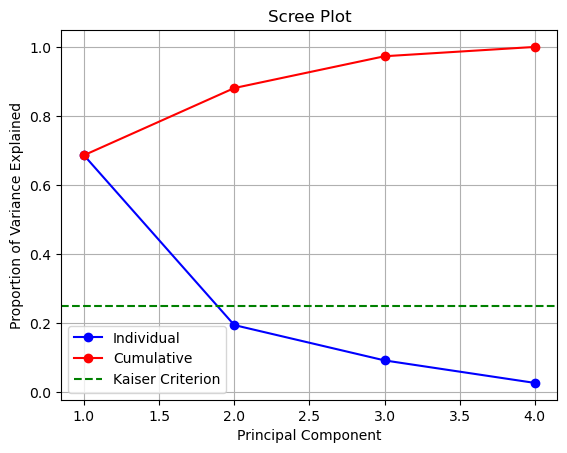

Eigenvalues: [2.75362487 0.7804609  0.36975289 0.10820954]
Components selected by Kaiser criterion (1-based): [1]
Number of components kept: 1


In [6]:
# Principal Component Selections
n_samples = X_scaled.shape[0]
eigenvalues = s**2 / (n_samples - 1)

explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

# This section generated with assistance from ChatGPT (version 5), accessed on 11/11/25
kaiser_mask = eigenvalues > 1 
kaiser_components = np.where(kaiser_mask)[0] + 1
n_kaiser = kaiser_mask.sum()
n_features = X_scaled.shape[1]
kaiser_threshold = 1 / n_features

plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-', label='Individual')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', label='Cumulative')
plt.axhline(y=kaiser_threshold, color='g', linestyle='--', label='Kaiser Criterion')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

print("Eigenvalues:", eigenvalues)
print("Components selected by Kaiser criterion (1-based):", kaiser_components)
print("Number of components kept:", n_kaiser)

- Based on the eigenvalues, the first four principal components have eigeenvalues 2.75, 0.78, 0.37, 0.1. Using Kaisen criterion (eigenvalues > 1), we would keep only the first component (eigenvalue 2.75). In the scree plot, PC1 is above the horizontal Kaiser line, while PC2-4 are below. However, the scree plot also shows an "elbow" at PC2, suggesting that keeping 2 components may be beneficial for capturing more variance (around 89% cumulative). So, according to Kaiser, I would keep 1 component (70%), but considering the scree plot, I would justify keeping 2 components for better representation of the data.

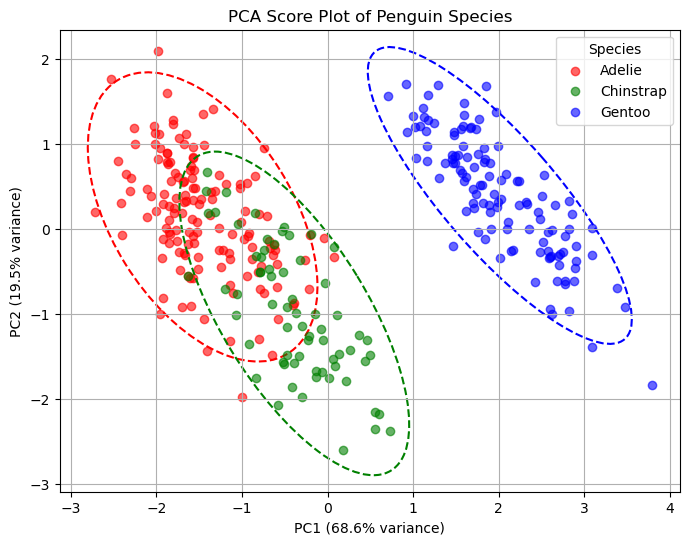

In [7]:
# Score Plot Analysis - This was generated with assistance from ChatGPT (version 5), accessed on 11/11/25
from matplotlib.patches import Ellipse

scores = X_scaled @ V
pc1 = scores[:, 0]
pc2 = scores[:, 1]

pc_df = penguins_clean[['species']].copy()
pc_df['PC1'] = pc1
pc_df['PC2'] = pc2

pc1_var = explained_variance[0] * 100
pc2_var = explained_variance[1] * 100

def add_confidence_ellipse(x, y, ax, edgecolor):
    x = np.asarray(x)
    y = np.asarray(y)

    cov = np.cov(x, y)
    vals, vecs = np.linalg.eigh(cov)

    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))

    chi2_val = 5.991
    width, height = 2 * np.sqrt(vals * chi2_val)

    ell = Ellipse(
        (x.mean(), y.mean()),
        width=width,
        height=height,
        angle=theta,
        fill=False,
        edgecolor=edgecolor,
        linestyle="--",
        linewidth=1.5,
    )
    ax.add_patch(ell)

fig, ax = plt.subplots(figsize=(8, 6))
species_list = pc_df['species'].unique()
colors = ['r', 'g', 'b']

for species, color in zip(species_list, colors):
    subset = pc_df[pc_df['species'] == species]
    ax.scatter(subset['PC1'], subset['PC2'], label=species, alpha=0.6, color=color)
    add_confidence_ellipse(subset['PC1'], subset['PC2'], ax, edgecolor=color)
ax.set_xlabel(f'PC1 ({pc1_var:.1f}% variance)')
ax.set_ylabel(f'PC2 ({pc2_var:.1f}% variance)')
ax.legend(title='Species')
ax.set_title('PCA Score Plot of Penguin Species')
plt.grid(True)
plt.show()

- The clustering patterns in the score plot show that the first 2 principal components effectively separate the three penguin species. Adelie penguins cluster overlap with Chinstrap penguins along both PC1 and PC2 with slight separation, while Gentoo penguins are distinctly separated from both along PC1. This indicates that the features captured by PC1 and PC2 are effective in distinguishing Gentoo from the other two species, while Adelie and Chinstrap have more similar characteristics in this low-dimensional space.

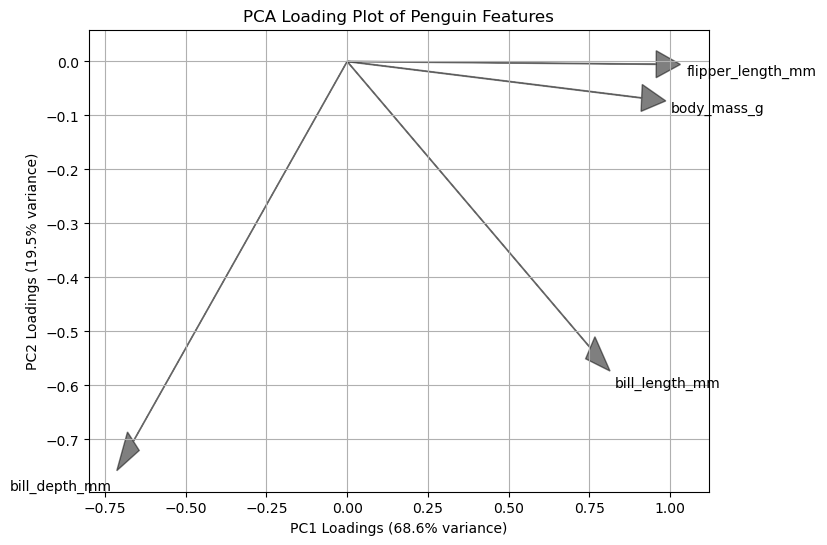

In [8]:
# Loading Plot Analysis - This was generated with assistance from ChatGPT (version 5), accessed on 11/11/25
loadings = V * (s / np.sqrt(n_samples - 1))
loadings_pc1 = loadings[:, 0]
loadings_pc2 = loadings[:, 1]

fig, ax = plt.subplots(figsize=(8, 6))
for i, feature in enumerate(numeric_cols):
    x = loadings_pc1[i]
    y = loadings_pc2[i]
    ax.arrow(0, 0, x, y, color='black', alpha=0.5, head_width=0.05)
    if x >= 0:
        ha = 'left'
    else:
        ha = 'right'
    if y >= 0:
        va = 'bottom'
    else:
        va = 'top'
    ax.text(x * 1.1, y * 1.1, feature, ha=ha, va=va)
ax.set_xlabel(f'PC1 Loadings ({pc1_var:.1f}% variance)')
ax.set_ylabel(f'PC2 Loadings ({pc2_var:.1f}% variance)')
ax.set_title('PCA Loading Plot of Penguin Features')
plt.grid(True)
plt.show()

- In the loading plot, flipper_length_mm, body_mass_g and bill_length_mm contribute most to PC1 in the positive direction, while bill_depth_mm contributes in the negative direction. For PC2, flipper_length_mm and body_mass_g contribute very little, while bill_length_mm and bill_depth_mm contribute stronly (largest loadings). This indicates that flipper length and body mass are the key features driving the variance captured by PC1, while bill dimensions are more influential for PC2.

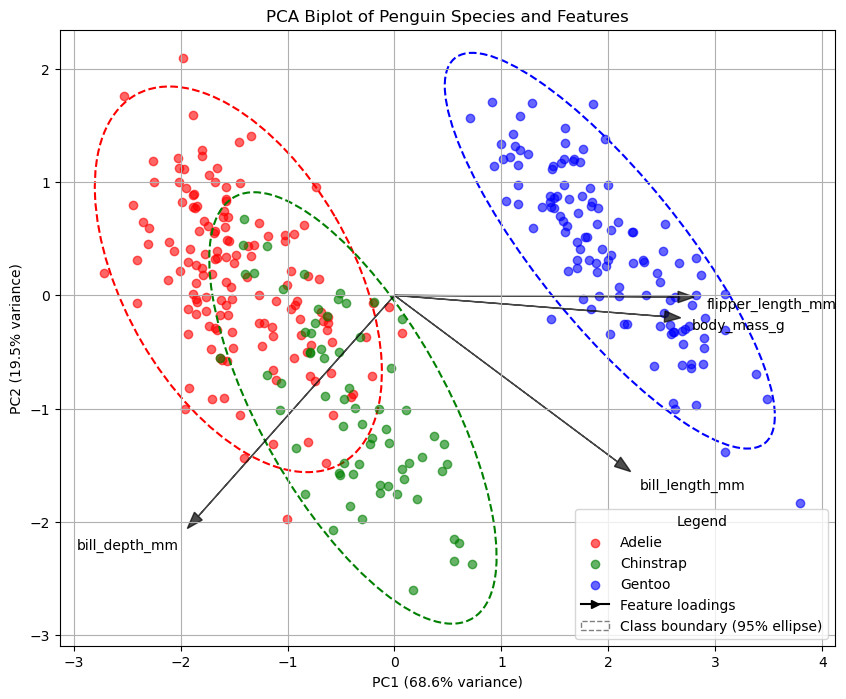

In [9]:
# Biplot Analysis - This was generated with assistance from ChatGPT (version 5), accessed on 11/11/25
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

scores_2d = scores[:, :2]
loadings_2d = loadings[:, :2]

score_max = np.max(np.abs(scores_2d)) * 1.1
loading_max = np.max(np.abs(loadings_2d)) * 1.1
scaling_factor = score_max / loading_max * 0.7

loadings_biplot = loadings_2d * scaling_factor

fig, ax = plt.subplots(figsize=(10, 8))
for species, color in zip(species_list, colors):
    subset = pc_df[pc_df['species'] == species]
    ax.scatter(subset['PC1'], subset['PC2'], label=species, alpha=0.6, color=color)
    add_confidence_ellipse(subset['PC1'], subset['PC2'], ax, edgecolor=color)
for i, feature in enumerate(numeric_cols):
    x = loadings_biplot[i, 0]
    y = loadings_biplot[i, 1]
    ax.arrow(0, 0, x, y, color='black', alpha=0.7, head_width=0.1)
    if x >= 0:
        ha = 'left'
    else:
        ha = 'right'
    if y >= 0:
        va = 'bottom'
    else:
        va = 'top'
    ax.text(x * 1.1, y * 1.1, feature, ha=ha, va=va, color='black')
ax.set_xlabel(f'PC1 ({pc1_var:.1f}% variance)')
ax.set_ylabel(f'PC2 ({pc2_var:.1f}% variance)')
ax.set_title('PCA Biplot of Penguin Species and Features')
plt.grid(True)
arrow_proxy   = mlines.Line2D([], [], linestyle="-", color="black",
                              marker=">", label="Feature loadings")
ellipse_proxy = mpatches.Patch(facecolor="none", edgecolor="grey",
                               linestyle="--", label="Class boundary (95% ellipse)")

# Combine species legend + generic legend
handles, labels = ax.get_legend_handles_labels()
handles.extend([arrow_proxy, ellipse_proxy])

ax.legend(handles=handles, title="Legend", loc="best")

plt.show()

Interpretation & Insights:
- Features: Arrows for flipper_length_mm, body_mass_g, and bill_length_mm point in similar directions along PC1, indicating positive correlations among these features. Bill_depth_mm points in the opposite direction, suggesting it is negatively correlated with the other three features.
- Classes: Gentoo penguins are clearly separated from Adelie and Chinstrap along PC1, indicating distinct characteristics. Adelie and Chinstrap overlap more, suggesting they share similar traits in this PCA space.
- Features and Classes: The biplot shows that Gentoo penguins have higher values for flipper_length_mm and body_mass_g, while Adelie and Chinstrap have lower values. Differences between Adelie and Chinstrap are more influenced by bill_length_mm and bill_depth_mm.
- Flipper length and body mass best distinguish Gentoo from the other species. Bill dimensions help differentiate Adelie from Chinstrap. A few points lie near the boundaries, but there are no strong outliers.

---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

**Jupyter Notebook (Classic):**
- Go to `Kernel` → `Restart & Clear Output`

**JupyterLab:**
- Go to `Kernel` → `Restart Kernel and Clear All Outputs...`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Restart" and select `Jupyter: Restart`
- Then select `Clear All Output`

**PyCharm:**
- Go to `Run` → `Restart Kernel` (or click the restart button in the toolbar)
- Go to `Cell` → `All Output` → `Clear`

### Step 2: Run All Cells

**Jupyter Notebook (Classic):**
- Go to `Cell` → `Run All`

**JupyterLab:**
- Go to `Run` → `Run All Cells`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Run All" and select `Jupyter: Run All Cells`

**PyCharm:**
- Go to `Cell` → `Run All` (or use `Ctrl+Shift+F10` / `Cmd+Shift+R`)

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.